# This notebook is a used for preliminary data exploration 

Data preprocessing:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

Cleaning weather data, Cleaning microtensiometer data & down sampling 

In [3]:
from data_preprocessing import clean_weather_data, clean_mt_data, down_sample_df

Exploratory data analysis

In [4]:
# path to read the weather data:
weather_path = r'C:\Users\hl943\Documents\personal documents\data science\Insight DS\project directory\Napa_weather_data_test.csv'
# path to read the microtensiometer data:
mT_path_1 =  r'C:\Users\hl943\Documents\personal documents\data science\Insight DS\project directory\M36_grape.csv'
mT_path_2 =  r'C:\Users\hl943\Documents\personal documents\data science\Insight DS\project directory\M37_grape.csv'

# Get weather dataframe
df_weather = down_sample_df(clean_weather_data(weather_path))

#some more feature cleaning
df_weather['incident energy'] = df_weather['Sol Rad (W/sq.m)']*df_weather['sunshine duration']/60/1000
df_weather.drop('Sol Rad (W/sq.m)', axis=1, inplace=True)
df_weather.drop('sunshine duration', axis=1, inplace=True)
# df_weather.drop('ETo (mm)', axis=1, inplace=True)
df_weather.drop('Eto simulated', axis=1, inplace=True)


df_mt1 = down_sample_df(clean_mt_data(mT_path_1))
df_mt2 = down_sample_df(clean_mt_data(mT_path_2))
df_data = df_weather.join(df_mt1)
#df_data = df_data.join(df_mt2)
df_data = df_data.dropna()


In [5]:
df_data.head()

,Hour (PST),Day of the Year,ETo (mm),Precip (mm),Vap Pres (kPa),Air Temp (C),Rel Hum (%),Dew Point (C),Wind Speed (m/s),Soil Temp (C),Soil moisture content,VPD,Baseline,incident energy,Averaged reading M36_grape.csv
Datetime,,,,,,,,,,,,,,,
2019-06-03 16:00:00,1600.0,0.421918,0.59,0.0,2.1,29.013168,0.55,18.4,4.3,21.9,0.220,17.206190,-3.401582,0.683000,0.00
2019-06-05 17:00:00,1700.0,0.427397,0.44,0.0,2.1,31.493168,0.46,18.4,3.6,23.9,0.211,23.820477,-3.745365,0.427505,-0.03
2019-06-05 18:00:00,1800.0,0.427397,0.28,0.0,2.1,30.153168,0.50,18.3,3.7,23.9,0.210,20.423243,-3.410997,0.000000,-0.03
2019-06-05 19:00:00,1900.0,0.427397,0.17,0.0,1.9,28.243168,0.57,16.7,4.2,23.8,0.210,15.719130,-3.023740,0.000000,-0.03
2019-06-05 20:00:00,2000.0,0.427397,0.07,0.0,1.7,25.533167,0.67,15.0,4.0,23.6,0.209,10.277420,-2.837770,0.000000,-0.04


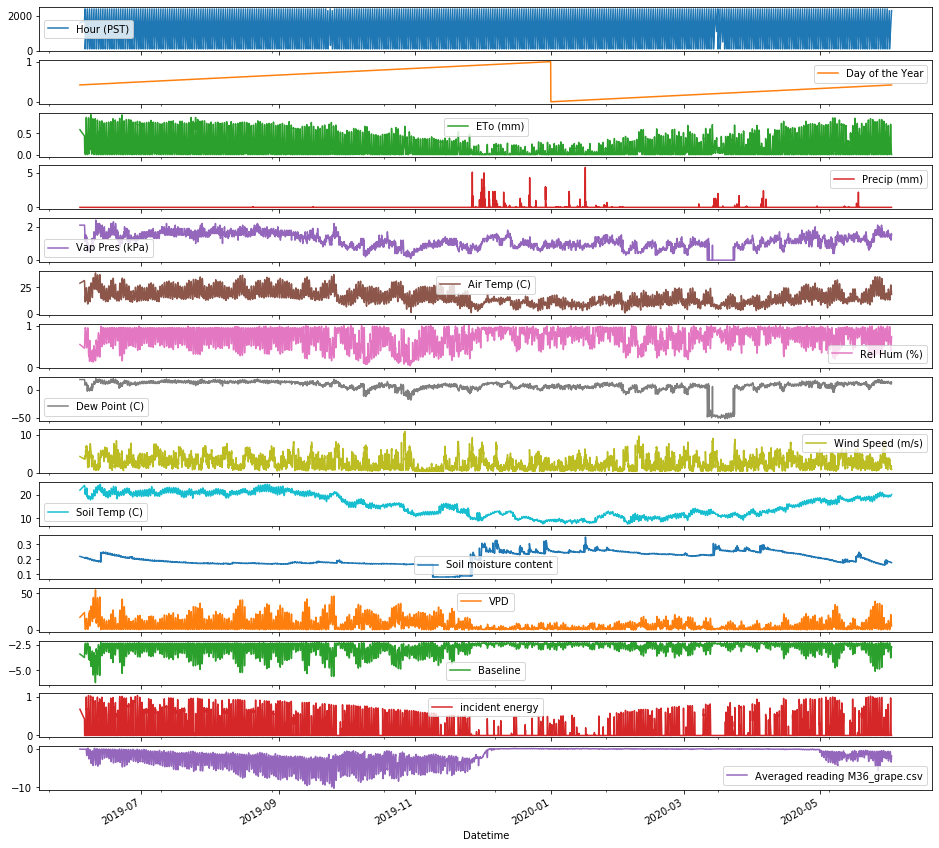

In [6]:
# some more feature engineering
df_data.plot(subplots=True, layout=(len(df_data.columns), 1), figsize=(16, 16), sharex=True);

In [145]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# decomp = seasonal_decompose(df_data['Averaged reading M36_grape.csv'], model='additive', period=720)
# mt_trend = decomp.trend.interpolate(method='linear',axis =0)

# #The mnimium point for linear regression
# minidx = mt_trend.idxmin()
# endidx = '2019-12-01 00:00:00'


# #Two linear trend from the target
# day_of_the_year_1 = df_data['Day of the Year'].loc[:minidx]
# day_of_the_year_2 = df_data['Day of the Year'].loc[minidx:endidx]
# df_trend_1 = df_data['Averaged reading M36_grape.csv'].loc[:minidx]
# df_trend_2 = df_data['Averaged reading M36_grape.csv'].loc[minidx:endidx]

# # Get the linear trend from 2019 data
# from sklearn.linear_model import LinearRegression
# regression_model_1 = LinearRegression()
# regression_model_2 = LinearRegression()
# regression_model_1.fit(day_of_the_year_1.values.reshape(-1,1), df_trend_1.values.reshape(-1,1))
# regression_model_2.fit(day_of_the_year_2.values.reshape(-1,1), df_trend_2.values.reshape(-1,1))

# def get_trend(date_info):
#     if date_info[-1]<minidx.dayofyear:
#         return regression_model_1.predict(date_info.values)
#     if date_info[-1]>minidx.dayofyear & date_info[0]<minidx.dayofyear:
#         y1 = regression_model_1.predict(date_info.loc[:minidx].values)
#         y2 = regression_model_2.predict(date_info.loc[minidx:].values)
#         return 
#     else:
#         return regression_model_2.predict(date_info.values)
# lin_trend = get_trend(date_info)
# minidx.dayofyear


## some observations from plots ##

1. The bulk of precipitation take place outside of growing seasons, thus it seemed that the natural precipitation does not play an important role in informing irrigation.

2. The off season with no growth, may exclude it. 

3. ET and solar radiation look similar, maybe only one feature is needed

4. The two mT readings has some variations not sure what to look at first

5. Think about making prediction with daily Max. vs hourly data.

6. There are long term trend of the season annually

7. One entire growing season should be a good time period to build a predictive model


# More data cleaning and feature engineering

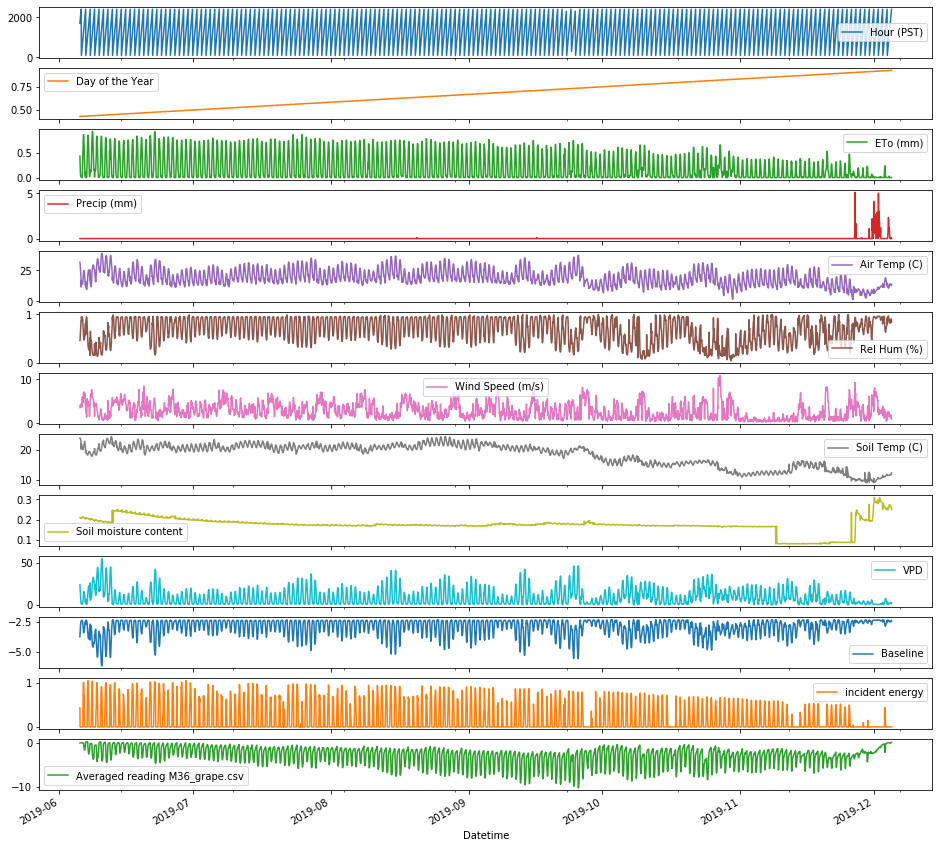

In [7]:
# defining the features and labels

#drop some features:
df_data.drop(columns = 'Vap Pres (kPa)',inplace=True)
df_data.drop(columns = 'Dew Point (C)',inplace=True)


start = '2019-06-05 00:00:00'
end = '2019-12-05 00:00:00'
df_data_2019 = df_data[start:end]
df_data_2019.plot(subplots=True, layout=(len(df_data.columns), 1), figsize=(16, 16), sharex=True);

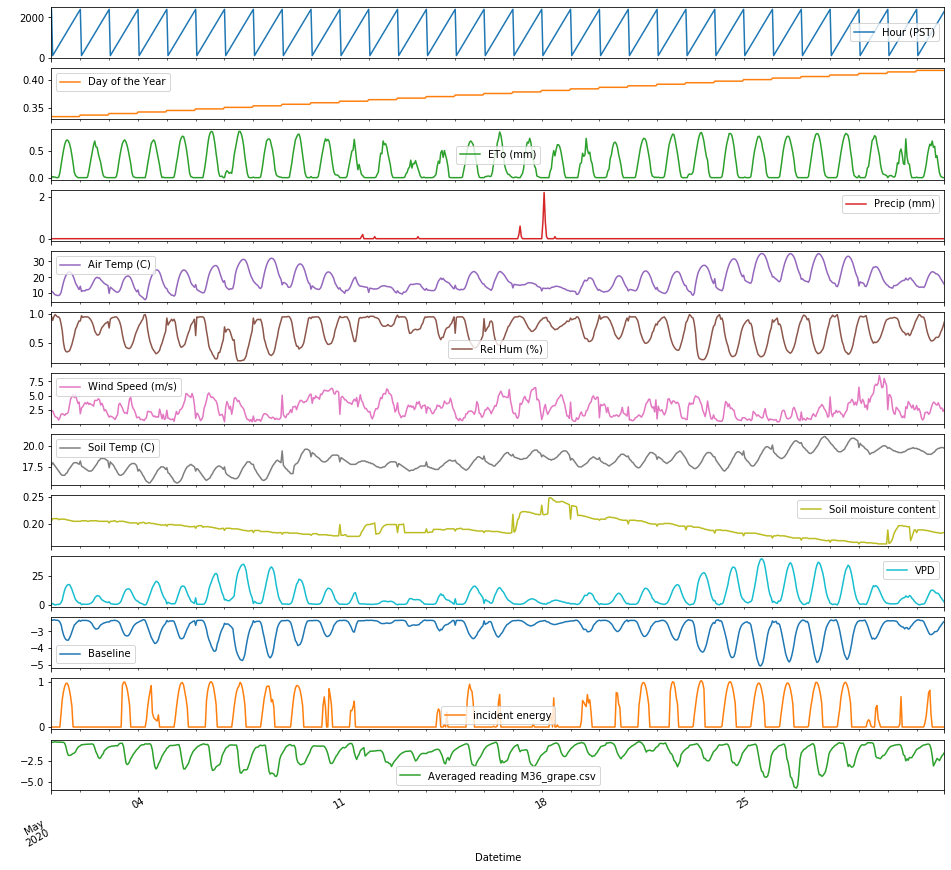

In [8]:
# defining the features and labels
start = '2020-05-01 00:00:00'
end = '2020-06-01 00:00:00'
df_data_2020 = df_data[start:end]
df_data_2020.plot(subplots=True, layout=(len(df_data.columns), 1), figsize=(16, 16), sharex=True);

# Mutli-variate LSTM

In [10]:
# multivariate lstm example
import numpy as np
from numpy import array
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Conv1D, MaxPooling1D, Bidirectional
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.tools.eval_measures import rmse
from tensorflow.keras.preprocessing import sequence
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error


def train_test_split(X,Y, split_size):
    assert(X.shape[0]==Y.shape[0])
    n = X.shape[0]
    n_tr = int((n*split_size))
    Xtr = X[:n_tr,:]
    Xte = X[n_tr+1:,:]
    Ytr = Y[:n_tr,:]
    Yte = Y[n_tr+1:,:]
    return Xtr, Xte, Ytr, Yte

def scale(train, test):
    scaler = StandardScaler()
    scaler = scaler.fit(train)
    
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)   

    return scaler, train_scaled, test_scaled


# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

def build_model(Xtr, Ytr, n_steps):
    #reframe to sequences
    Xtr_seq, Ytr_seq = split_sequences(np.hstack((Xtr,Ytr)), n_steps)
    Ytr_seq=Ytr_seq.reshape(-1,1)
    Xtr_seq, Xte_seq, Ytr_seq, Yte_seq = train_test_split(Xtr_seq,Ytr_seq, 0.8)

    # Train and validation 
    n_features = Xtr_seq.shape[2]
    opt = keras.optimizers.Adam(learning_rate = 0.0001)
    
    # Train and validation 
    #LSTM model
    model = Sequential()
    model.add(Bidirectional(LSTM(128, return_sequences=True), merge_mode='concat'))
    model.add(Dropout(0.2))
    model.add(LSTM(128, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer=opt, loss='mse')
    history = model.fit(Xtr_seq, Ytr_seq, batch_size=32, epochs=100, verbose=1, validation_data=(Xte_seq, Yte_seq))
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()
    plt.show()
    return model

# make a forecast
def forecast(model, Xte, n_steps):
    dummy_y = np.zeros((Xte.shape[0],1))
    Xte_seq, _= split_sequences(np.hstack((Xte,dummy_y)), n_steps)
    yhat = model.predict(Xte_seq, verbose=0)
    # we only want the vector forecast
    return yhat

# nested cross validation 
def cv_model(X, Y, n_steps, n_split=5):
    tscv = TimeSeriesSplit(n_splits = n_split)
    rmse = []
    for train_index, test_index in tscv.split(X):
        cv_Xtr, cv_Xte = X[train_index], X[test_index]
        cv_Ytr, cv_Yte = Y[train_index], Y[test_index]
        model = build_model(cv_Xtr, cv_Xte, cv_Ytr, cv_Yte, n_steps)
        predictions = forecast(model, cv_Xte, n_steps)
        true_values = cv_Yte
        rmse.append(np.sqrt(mean_squared_error(true_values[n_steps-1:], predictions)))
    print("RMSE: {}".format(np.mean(rmse)))
    return model, rmse


C:\Users\hl943\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\hl943\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\hl943\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\hl943\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.

In [12]:
Xtr = df_data_2019.values[:,:-1]
Ytr = df_data_2019.values[:,-1].reshape(-1,1)
Xte = df_data_2020.values[:,:-1]
Yte = df_data_2020.values[:,-1].reshape(-1,1)


# define dataset
def df_to_train_test(X,Y, split_size):
    Xtr, Xte, Ytr, Yte = train_test_split(X, Y, split_size)
    scaler, Xtr_scaled, Xte_scaled = scale(Xtr, Xte)
    return scaler, Xtr_scaled, Xte_scaled, Ytr, Yte
# Train on 2019 data
split_size = 0.8
scaler, Xtr_scaled, Xte_scaled, Ytr_scaled, Yte_scaled = df_to_train_test(Xtr, Ytr, split_size)

Train on 2784 samples, validate on 696 samples
Epoch 1/100
2784/2784 [==============================] - 4s 2ms/sample - loss: 6.6526 - val_loss: 11.7718
Epoch 2/100
2784/2784 [==============================] - 2s 548us/sample - loss: 1.0534 - val_loss: 1.4126
Epoch 3/100
2784/2784 [==============================] - 2s 547us/sample - loss: 0.5013 - val_loss: 1.9673
Epoch 4/100
2784/2784 [==============================] - 2s 550us/sample - loss: 0.3529 - val_loss: 2.3947
Epoch 5/100
2784/2784 [==============================] - 2s 549us/sample - loss: 0.2762 - val_loss: 2.1431
Epoch 6/100
2784/2784 [==============================] - 2s 554us/sample - loss: 0.2376 - val_loss: 1.7427
Epoch 7/100
2784/2784 [==============================] - 2s 559us/sample - loss: 0.2209 - val_loss: 1.8212
Epoch 8/100
2784/2784 [==============================] - 2s 674us/sample - loss: 0.2059 - val_loss: 1.2126
Epoch 9/100
2784/2784 [==============================] - 2s 713us/sample - loss: 0.1932 - val_loss

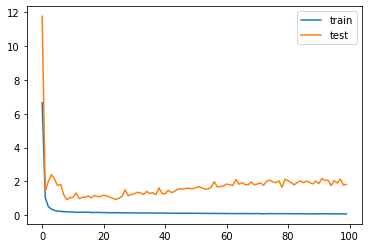

In [29]:
# Define and train model
n_steps=12
model = build_model(Xtr_scaled, Ytr, n_steps)

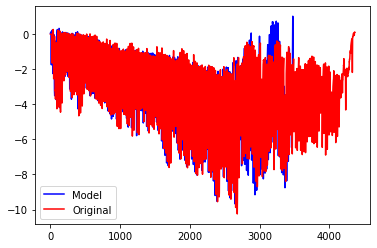

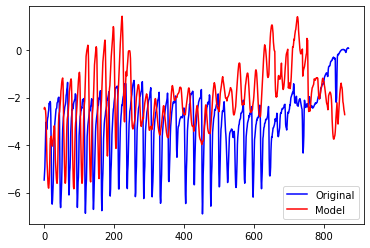

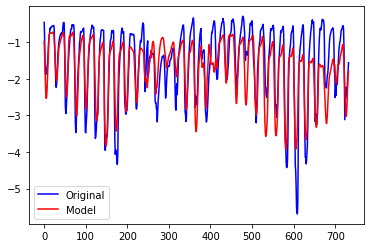

In [80]:
# training data vs. model
Y_pred = forecast(model, Xtr_scaled, n_steps)
Y_pred = np.array(Y_pred).flatten()
fig1=plt.figure(1)
plt.plot(Y_pred, color='blue', label='Model')
plt.plot(Ytr, color='red',label='Original')
plt.legend()

# test data vs. model
Y_pred_2019 = forecast(model, Xte_scaled, n_steps)
Y_pred_2019 = np.array(Y_pred_2019).flatten()
Yte_2019=Yte
fig2 = plt.figure(2)
plt.plot(Yte_scaled, color='blue', label='Original')
plt.plot(Y_pred_2019,color='red',label='Model')
plt.legend()

# LR_data_2020 = df_data['2020-05-01 00:00:00':'2020-06-01 00:00:00']
Xte = df_data_2020.values[:,:-1]
Xte_scaled = scaler.transform(Xte)
Yte_2020 = df_data_2020.values[:,-1].reshape(-1,1)
Y_pred_2020 = forecast(model, Xte_scaled, n_steps)
Y_pred_2020 = np.array(Y_pred_2020).flatten()
fig3 = plt.figure(3)
plt.plot(Yte[n_steps-1:],color='blue', label='Original')
plt.plot(Y_pred_2020-1,color='red',label='Model')
plt.legend()

# Now figure how how to pickle a model


In [24]:
from sklearn.metrics import mean_absolute_error

def corr_score(Yte, Y_pred):
    temp = np.corrcoef(Yte, Y_pred)
    return temp[0,1]

LSTM_score = mean_absolute_error(Yte[:(-n_steps+1)], Y_pred_2020)
LSTM_r2_score = r2_score(Yte_2020[:(-n_steps+1)], Y_pred_2020-1)
corr_score_LSTM = corr_score(Yte[n_steps:-n_steps+1].reshape(1,-1), Y_pred_2020[:-n_steps]-1)
print(LSTM_score)
print(LSTM_r2_score)
print(corr_score_LSTM)

NameError: name 'n_steps' is not defined

In [53]:
from keras.models import model_from_json
from keras.models import load_model
import os
model.save("model.h5")

## Feature importance in LSTM

# Linear Regression

In [130]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(Xtr, Ytr)

lr_y_fit = lr_model.predict(Xtr)
lr_y_pred = lr_model.predict(Xte)


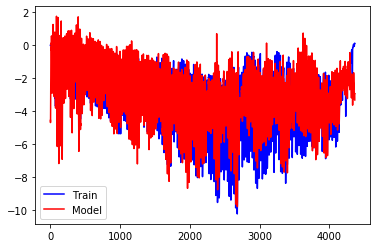

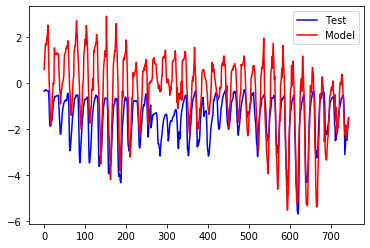

In [139]:
fig7 = plt.figure(7)
plt.plot(Ytr, color='blue', label='Train')
plt.plot(lr_y_fit,color='red',label='Model')
plt.legend()

fig8 = plt.figure(8)
plt.plot(Yte_2020,color='blue', label='Test')
plt.plot(lr_y_pred-1,color='red',label='Model')
plt.legend()

In [22]:
from sklearn.metrics import r2_score
lr_score = mean_absolute_error(Yte_2020, lr_y_pred)
lr_r2_score = r2_score(Yte_2020, lr_y_pred)
corr_score_lr = corr_score(Yte_2020, lr_y_pred)
print(rf_score)
print(lr_r2_score)
print(corr_score_rf)

NameError: name 'Yte_2020' is not defined

# VAR

In [ ]:
# Preprocess data for VAR
df_diff = df_data_2019.diff(periods=24)
# df_diff.plot(subplots=True, layout=(len(df_data.columns), 1), figsize=(16, 16), sharex=True)
# plt.show()

In [ ]:
# df_diff.drop(columns='Hour (PST)', inplace = True)
# df_diff.drop(columns='Day of the Year', inplace =True)
df_diff.dropna(inplace=True)

In [ ]:
# define and fit model 
### FIND BEST VAR ORDER ###
from statsmodels.tsa.vector_ar.var_model import VAR

def tune_VAR(train, max_lags):
    BIC = {}
    best_bic, best_order = np.inf, 0

    for i in range(1,max_lags):
        model = VAR(endog=train)
        model_result = model.fit(maxlags=i)
        BIC[i] = model_result.bic

        if BIC[i] < best_bic:
            best_aic = BIC[i]
            best_order = i

    print('BEST ORDER', best_order, 'BEST bic:', best_bic)
    best_model = model.fit(best_order)
    return best_model, best_order, BIC

In [ ]:
date = '2019-10-01 14:00'
train_diff = df_diff.loc[:date]
var = VAR(endog=df_diff.values)
best_model, best_order, best_aic = tune_VAR(df_diff.values, 180)
var_result = var.fit(maxlags=best_order)


In [ ]:
### PLOT AICs ### 

plt.figure(figsize=(14,5))
plt.plot(range(len(AIC)), list(AIC.values()))
# plt.plot([best_order-1], [best_aic], marker='o', markersize=8, color="red")
plt.xticks(range(len(AIC)), range(1,10))
plt.xlabel('lags'); plt.ylabel('AIC')
np.set_printoptions(False)

In [ ]:
def retrive_prediction(prior, prior_init, steps):
    
    pred = var_result.forecast(np.asarray(prior), steps=steps)
    init = prior_init.tail(period).values
    
    if steps > period:
        id_period = list(range(period))*(steps//period)
        id_period = id_period + list(range(steps-len(id_period)))
    else:
        id_period = list(range(steps))
    
    final_pred = np.zeros((steps, prior.shape[1]))
    for j, (i,p) in enumerate(zip(id_period, pred)):
        final_pred[j] = init[i]+p
        init[i] = init[i]+p    
        
    return final_pred

In [ ]:
date = '2019-09-01 14:00'
forward = 480
date_range = pd.date_range(date, periods=forward+1, freq='H', closed='right')

final_p

# Random Forest


In [101]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(n_estimators=1000, criterion = "mae")
Xtr_rf_scaled=scaler.transform(Xtr)
Ytr_rf = df_data_2019.values[:,-1].reshape(-1,1)
regr.fit(Xtr_rf_scaled, Ytr_rf.ravel())
Y_pred_rf = regr.predict(Xte_scaled)

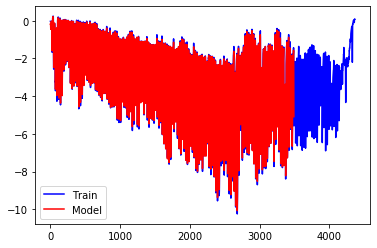

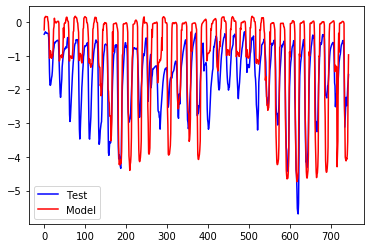

In [155]:
fig4 = plt.figure(4)
Y_pred_rf = regr.predict(Xte_scaled)
Ytr_pred_rf = regr.predict(Xtr_scaled)
plt.plot(Ytr_rf,color='blue', label='Train')
plt.plot(Ytr_pred_rf,color='red',label='Model')
plt.legend()

fig5 = plt.figure(5)
plt.plot(Yte_2020,color='blue', label='Test')
plt.plot(Y_pred_rf,color='red',label='Model')
plt.legend()

In [156]:
rf_score = mean_absolute_error(Yte_2020, Y_pred_rf)
rf_r2_score = r2_score(Yte_2020, Y_pred_rf)
corr_score_rf = corr_score(Yte_2020.reshape(1,-1), Y_pred_rf)
print(rf_score)
print(rf_r2_score)
print(corr_score_rf)

0.8825758803763446
-0.020568949300450168
0.7897035830780005


# XGBoost

In [13]:
import xgboost
from xgboost import plot_importance
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_absolute_error


parameters_for_testing = {
   'colsample_bytree':[0.4,0.6,0.8],
   'gamma':[0,0.03,0.1],
   'min_child_weight':[1.5,6],
   'learning_rate':[0.1, 0.03, 0.07],
   'max_depth':[3,5],
   'n_estimators':[1000],
   'reg_alpha':[1e-5, 1e-2, 0.75],
   'reg_lambda':[1e-5, 1e-2, 0.45],
   'subsample':[0.6,0.95]
}
    
    
xgb_model = xgboost.XGBRegressor(learning_rate =0.1, n_estimators=1000, 
                                 max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, nthread=6, scale_pos_weight=1, seed=27)
# xgb_model.fit(Xtr,Ytr)
# print (gsearch1.grid_scores_)
# print('best params')
# print (gsearch1.best_params_)
# print('best score')
# print (gsearch1.best_score_)

gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6, iid=False, verbose=10, scoring='neg_mean_squared_error')
gsearch1.fit(Xtr,Ytr)


Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    7.2s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    7.4s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:   17.6s
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:   23.9s
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:   29.3s
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   41.6s
[Parallel(n_jobs=6)]: Done  49 tasks      | elapsed:   53.0s
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed:   59.3s
[Parallel(n_jobs=6)]: Done  73 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done  86 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 101 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 116 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 133 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:  2.5min
[Parallel(n_jobs=6)]: Done 169 tasks      | elapsed:  2.8min
[Parallel(

[Parallel(n_jobs=6)]: Done 9236 tasks      | elapsed: 248.1min
[Parallel(n_jobs=6)]: Done 9373 tasks      | elapsed: 252.0min
[Parallel(n_jobs=6)]: Done 9510 tasks      | elapsed: 255.3min
[Parallel(n_jobs=6)]: Done 9649 tasks      | elapsed: 259.6min
[Parallel(n_jobs=6)]: Done 9720 out of 9720 | elapsed: 261.8min finished
C:\Users\hl943\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    gamma=0, gpu_id=None,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_delta_step=None,
                                    max_depth=5, min_child_weight=1,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100...
             param_grid={'colsample_bytree': [0.4, 0.6, 0.8],
                         'gamma': [0, 0.03, 0.1],
                         'learning_rate': [0.1, 0.03, 0.07],
                         'max_depth': [3, 5], 'min_child_weight': [1.5, 6],
                         'n_estimators': [1

In [16]:
best_param = gsearch1.best_params_
best_param

{'colsample_bytree': 0.6,
 'gamma': 0.03,
 'learning_rate': 0.03,
 'max_depth': 5,
 'min_child_weight': 1.5,
 'n_estimators': 1000,
 'reg_alpha': 0.75,
 'reg_lambda': 0.45,
 'subsample': 0.6}

In [17]:
xgb_model = xgboost.XGBRegressor(earning_rate =0.07, n_estimators=1000, 
                                 max_depth=5, min_child_weight=1.5, gamma=0.03, subsample=0.6, colsample_bytree=0.6, reg_alpha=0.75, reg_lambda=0.45)
xgb_model_best = xgb_model.fit(Xtr, Ytr)
Yte_xgb = xgb_model_best.predict(Xte)

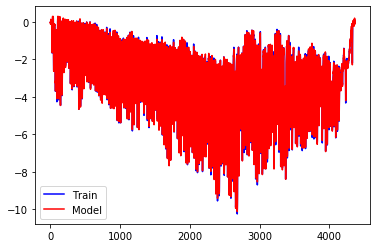

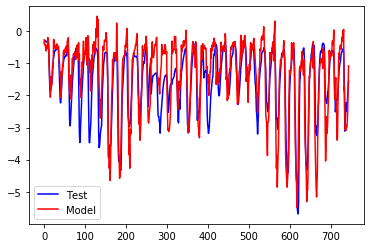

In [19]:
fig7 = plt.figure(7)
plt.plot(Ytr,color='blue', label='Train')
plt.plot(xgb_model_best.predict(Xtr),color='red',label='Model')
plt.legend()
fig6 = plt.figure(6)
plt.plot(Yte,color='blue', label='Test')
plt.plot(Yte_xgb-1,color='red',label='Model')
plt.legend()

In [27]:
xgb_score = mean_absolute_error(Yte, Yte_xgb-1)
xgb_r2_score = r2_score(Yte, Yte_xgb-1)
corr_score_xgb = corr_score(Yte.reshape(1,-1), Yte_xgb-1)
print(xgb_score)
print(xgb_r2_score)
print(corr_score_xgb)

0.5226162938490563
0.5389535335088018
0.8231702786565752


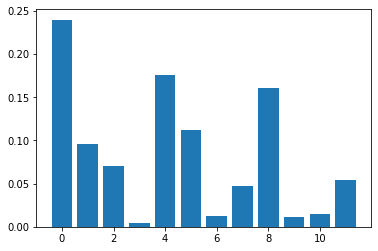

In [157]:
plt.bar(range(len(xgb_model_best.feature_importances_)), xgb_model_best.feature_importances_)
plt.show()

In [30]:
import pickle
file_name = "xgb_reg.pkl"

# save
pickle.dump(xgb_model_best, open(file_name, "wb"))

# load
xgb_model_loaded = pickle.load(open(file_name, "rb"))

# test
# ind = 1
# test = Xte[ind]
# xgb_model_loaded.predict(test)[0] == xgb_model.predict(test)[0]